In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

base_path = 'drive/My Drive/SpeechRecognition/kaggle/input'

paths = []
labels = []

for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)
        folder_name = os.path.basename(dirname)
        emotion = folder_name.split('_', 1)[1]
        if 'pleasent' in emotion or 'pleasant' in emotion:
            emotion = 'pleasant_surprise'
        labels.append(emotion.lower())

print("Dataset is Loaded")
print("Total samples:", len(paths))
print("Unique labels:", set(labels))


Dataset is Loaded
Total samples: 2800
Unique labels: {'neutral', 'disgust', 'sad', 'angry', 'pleasant_surprise', 'fear', 'happy'}


In [4]:
paths[:5]

['drive/My Drive/SpeechRecognition/kaggle/input/OAF_Pleasant_surprise/OAF_fit_ps.wav',
 'drive/My Drive/SpeechRecognition/kaggle/input/OAF_Pleasant_surprise/OAF_lid_ps.wav',
 'drive/My Drive/SpeechRecognition/kaggle/input/OAF_Pleasant_surprise/OAF_dodge_ps.wav',
 'drive/My Drive/SpeechRecognition/kaggle/input/OAF_Pleasant_surprise/OAF_date_ps.wav',
 'drive/My Drive/SpeechRecognition/kaggle/input/OAF_Pleasant_surprise/OAF_lot_ps.wav']

In [5]:
labels[:5]

['pleasant_surprise',
 'pleasant_surprise',
 'pleasant_surprise',
 'pleasant_surprise',
 'pleasant_surprise']

In [6]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,drive/My Drive/SpeechRecognition/kaggle/input/...,pleasant_surprise
1,drive/My Drive/SpeechRecognition/kaggle/input/...,pleasant_surprise
2,drive/My Drive/SpeechRecognition/kaggle/input/...,pleasant_surprise
3,drive/My Drive/SpeechRecognition/kaggle/input/...,pleasant_surprise
4,drive/My Drive/SpeechRecognition/kaggle/input/...,pleasant_surprise


In [7]:
df['label'].value_counts()

,count
label,
pleasant_surprise,400
disgust,400
angry,400
neutral,400
happy,400
sad,400
fear,400


<Axes: xlabel='label', ylabel='count'>

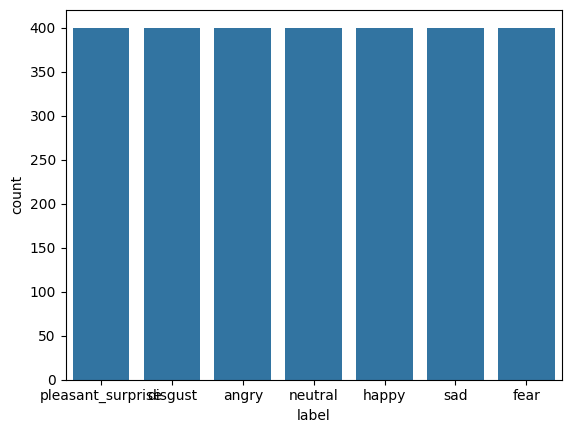

In [8]:
sns.countplot(data=df,x='label')

In [9]:
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()
def spectogram(data,sr,emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

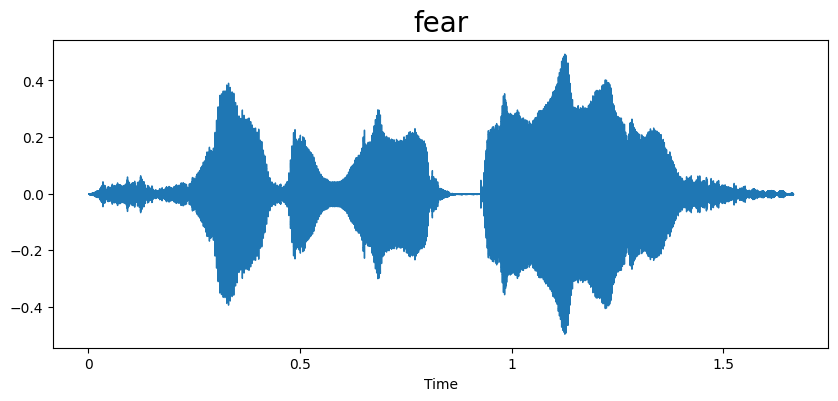

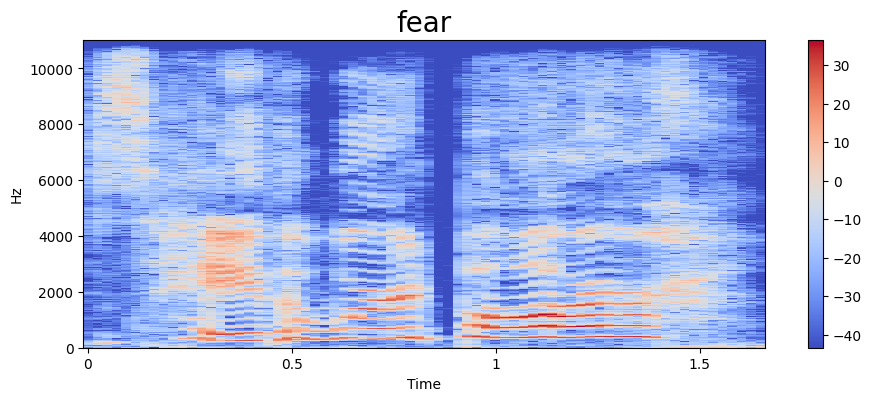

In [10]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

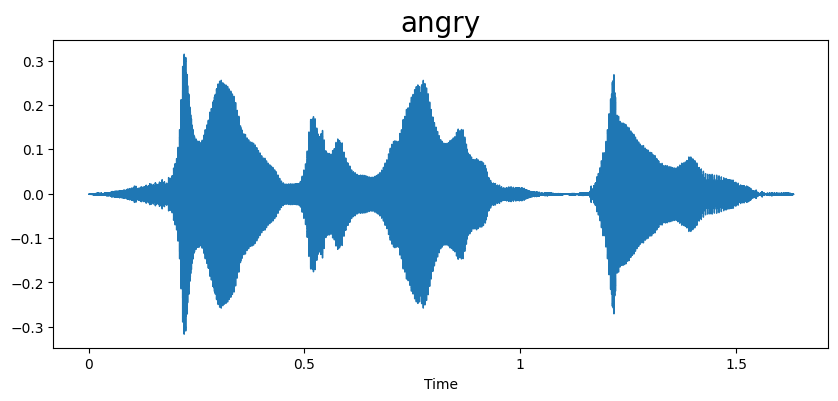

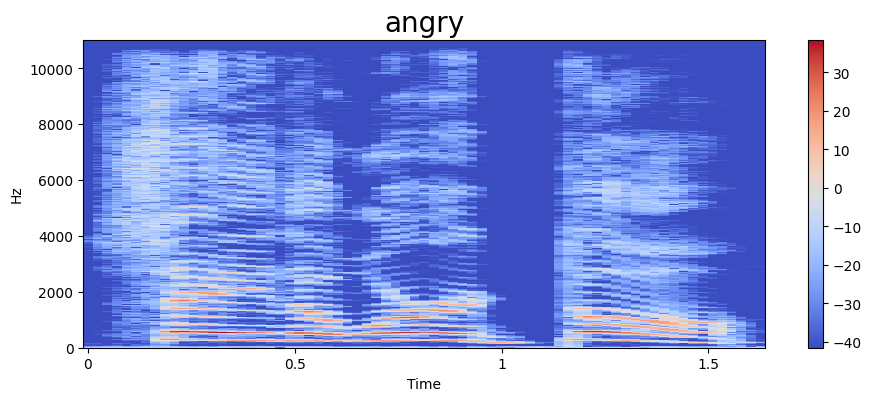

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

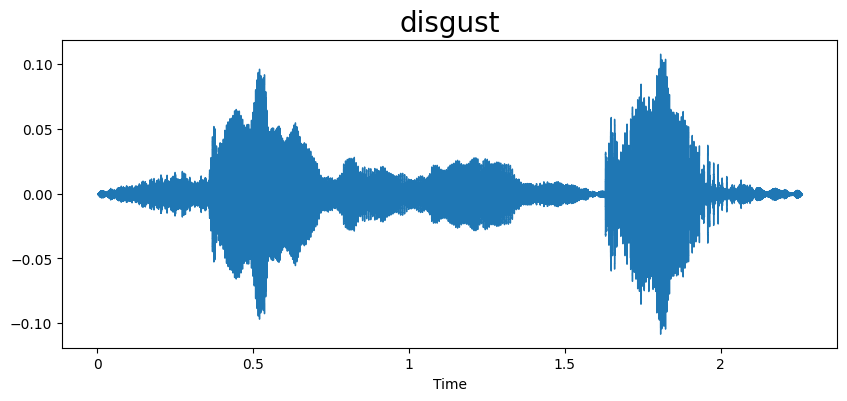

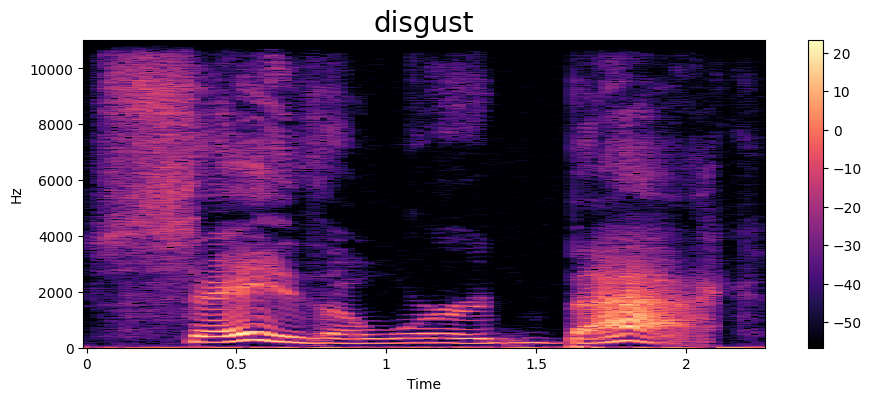

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

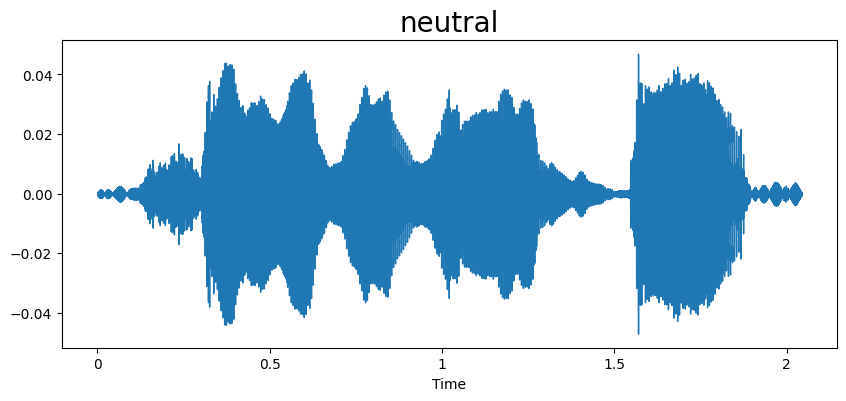

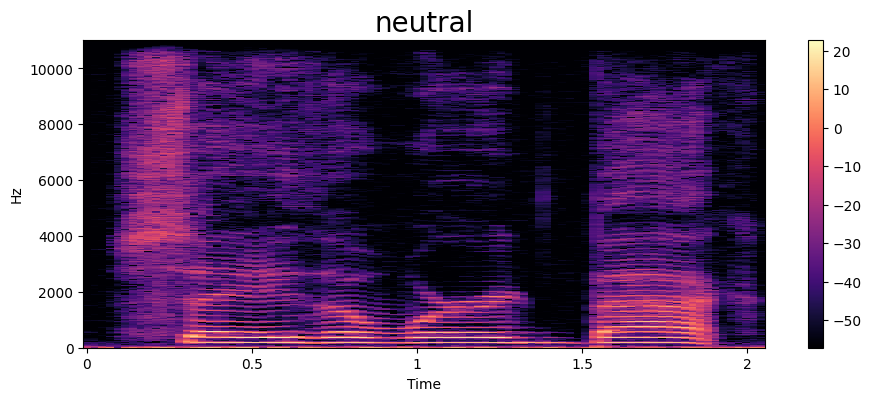

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

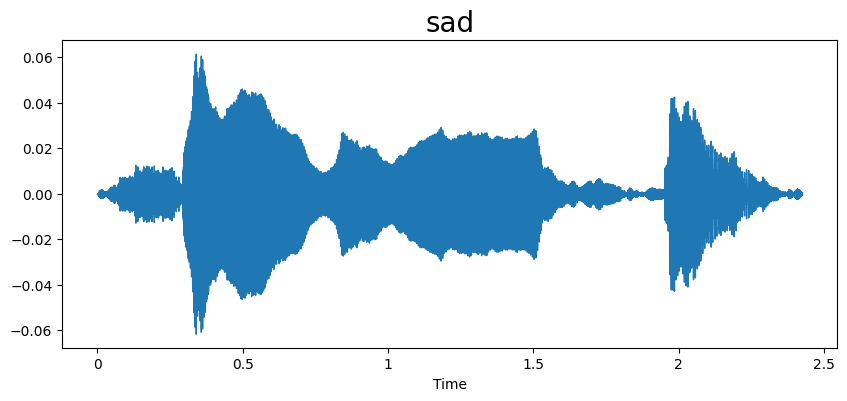

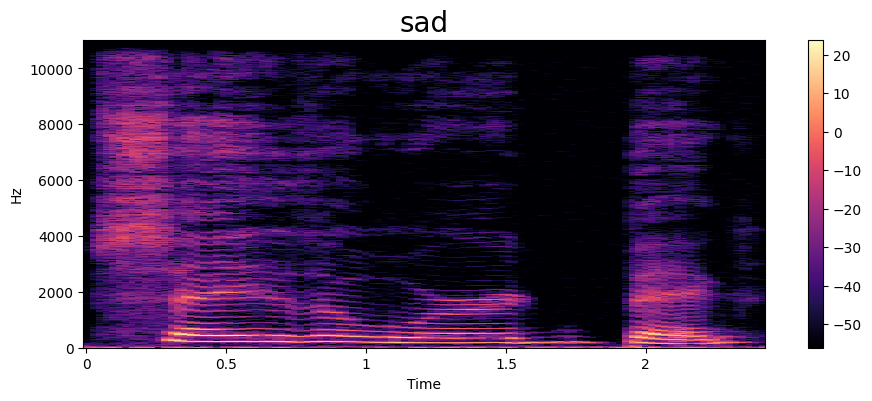

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

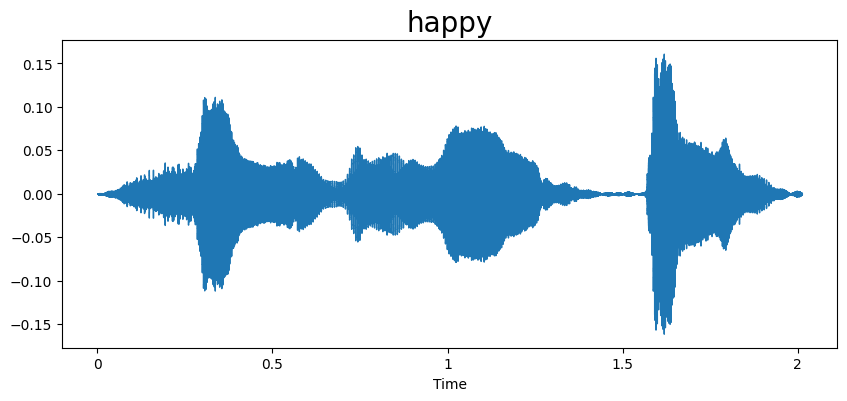

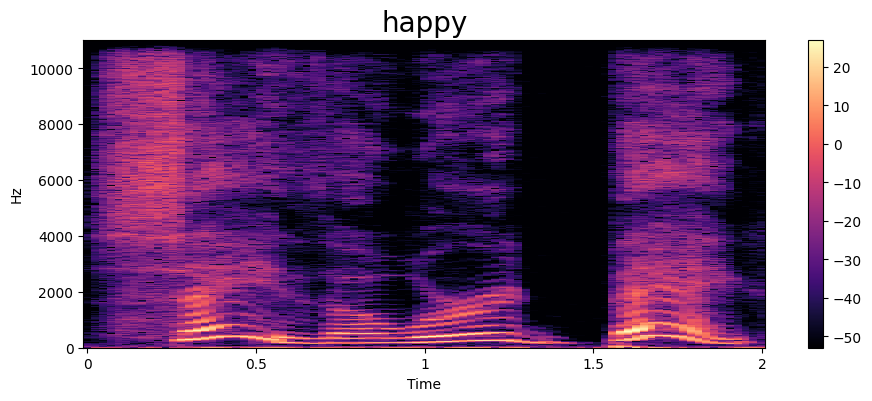

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

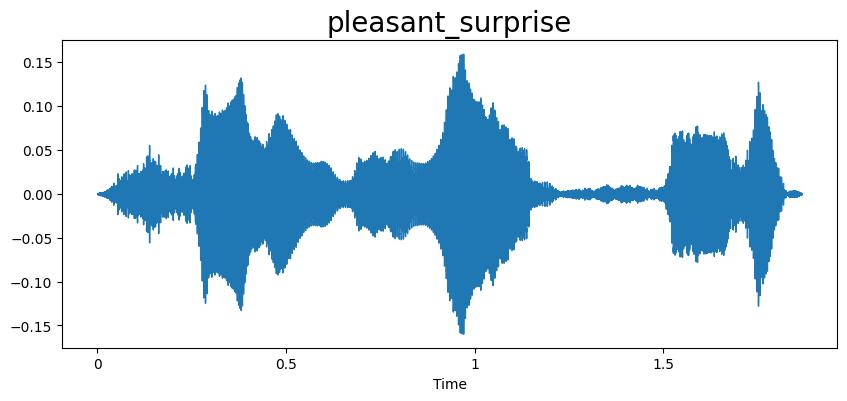

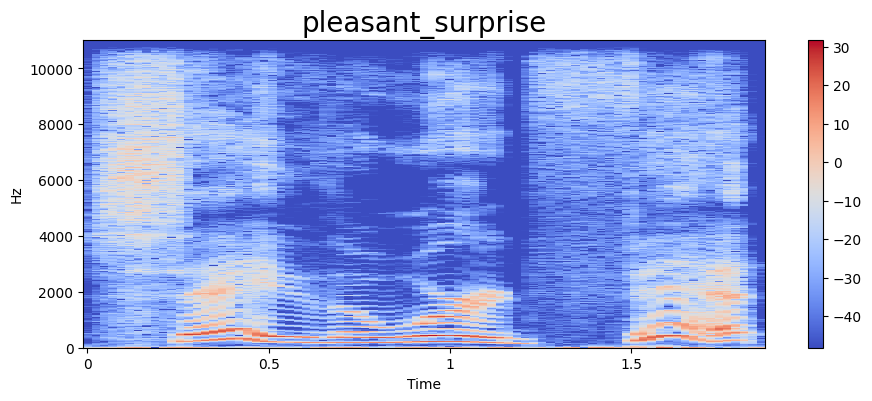

In [16]:
emotion = 'pleasant_surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename,duration=3,offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.27152191e+02,  8.05435333e+01,  1.21751337e+01, -1.46097488e+01,
        1.96250935e+01, -5.61563587e+00, -1.18721581e+01, -1.02860653e+00,
       -1.33266878e+01,  5.92001788e-02, -1.85255566e+01, -4.22047043e+00,
       -2.52579451e+00,  2.09742472e-01, -1.22548735e+00,  2.85107756e+00,
        8.11475217e-01,  1.15506792e+01,  2.25791529e-01,  2.18738508e+00,
        4.13249955e-02,  4.66641712e+00, -5.91799879e+00,  3.42685270e+00,
       -5.30421162e+00,  5.02089930e+00, -6.62405968e+00,  4.71251440e+00,
       -2.38722491e+00,  6.33935595e+00,  4.85400343e+00,  8.11645126e+00,
        9.91120529e+00,  8.91393089e+00,  1.07596140e+01,  1.46898727e+01,
        1.31841116e+01,  1.54092379e+01,  1.21067705e+01,  6.61284161e+00],
      dtype=float32)

In [19]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [20]:
X_mfcc

,speech
0,"[-427.1522, 80.54353, 12.175134, -14.609749, 1..."
1,"[-418.22528, 112.20568, 13.594434, -6.276009, ..."
2,"[-429.5762, 96.84066, 10.53767, -11.502708, 6...."
3,"[-455.1277, 94.63888, 18.632357, 7.485043, 25...."
4,"[-499.28534, 131.3805, 14.614841, -8.505297, -..."
...,...
2795,"[-312.21658, 66.644394, -28.850216, 24.056618,..."
2796,"[-308.78882, 68.01588, -17.321383, 15.535962, ..."
2797,"[-341.28436, 63.191948, -17.343605, 15.224253,..."
2798,"[-279.50354, 52.572674, -12.510866, 15.144852,..."


In [21]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [22]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [24]:
y=y.toarray()

In [26]:
y.shape

(2800, 7)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history=model.fit(X,y,validation_split=0.2,epochs=50,batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4574 - loss: 1.4700 - val_accuracy: 0.0018 - val_loss: 3.6911
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8224 - loss: 0.4908 - val_accuracy: 0.2857 - val_loss: 3.7076
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9070 - loss: 0.2615 - val_accuracy: 0.3804 - val_loss: 3.9168
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9431 - loss: 0.1606 - val_accuracy: 0.3464 - val_loss: 3.7034
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9465 - loss: 0.1676 - val_accuracy: 0.3375 - val_loss: 4.7064
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9624 - loss: 0.1241 - val_accuracy: 0.3054 - val_loss: 4.9203
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9733 - loss: 0.0824 - val_accuracy: 0.3375 - val_loss: 4.9251
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9751 - loss: 0.0694 - val_accuracy: 0.3714 - v

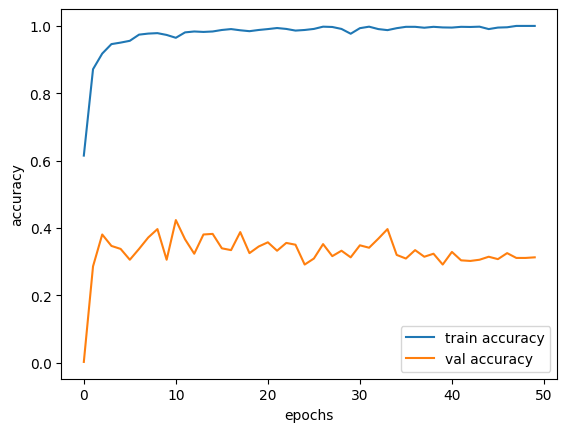

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

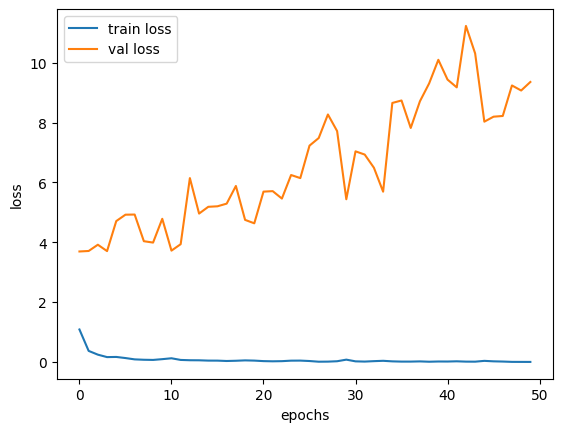

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
for key, value in history.history.items():
    print(f"{key}: {value[-1]}")

accuracy: 1.0
loss: 0.0007576626376248896
val_accuracy: 0.3125
val_loss: 9.354423522949219


In [33]:
print(os.getcwd())

/content


In [34]:
model.save("/content/drive/My Drive/SpeechRecognition/speech_emotion_model.keras")